In [29]:
import fastf1 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import requests
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse

In [30]:
session_2024 = fastf1.get_session(2024, 'Hungary', 'R')
session_2024.load()

core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '4', '44', '16', '1', '55', '11', '63', '22', '18', '14', '3', '27', '23', '20', '77', '2', '31', '24', '10']


In [31]:
session_2024

2024 Season Round 13: Hungarian Grand Prix - Race

In [32]:
session_2024.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:56:31.948000,PIA,81,0 days 00:01:26.746000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:29.625000,...,True,McLaren,0 days 00:55:04.938000,2024-07-21 13:02:58.551,1,1.0,False,,False,False
1,0 days 00:57:55.986000,PIA,81,0 days 00:01:24.038000,2.0,1.0,NaT,NaT,0 days 00:00:29.924000,0 days 00:00:30.425000,...,True,McLaren,0 days 00:56:31.948000,2024-07-21 13:04:25.561,1,1.0,False,,False,True
2,0 days 00:59:20.387000,PIA,81,0 days 00:01:24.401000,3.0,1.0,NaT,NaT,0 days 00:00:30.303000,0 days 00:00:30.297000,...,True,McLaren,0 days 00:57:55.986000,2024-07-21 13:05:49.599,1,1.0,False,,False,True
3,0 days 01:00:44.502000,PIA,81,0 days 00:01:24.115000,4.0,1.0,NaT,NaT,0 days 00:00:30.145000,0 days 00:00:30.338000,...,True,McLaren,0 days 00:59:20.387000,2024-07-21 13:07:14.000,1,1.0,False,,False,True
4,0 days 01:02:08.298000,PIA,81,0 days 00:01:23.796000,5.0,1.0,NaT,NaT,0 days 00:00:30.091000,0 days 00:00:30.157000,...,True,McLaren,0 days 01:00:44.502000,2024-07-21 13:08:38.115,1,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,0 days 01:37:07.036000,GAS,10,0 days 00:01:41.671000,29.0,2.0,0 days 01:35:45.056000,NaT,0 days 00:00:47.902000,0 days 00:00:30.206000,...,True,Alpine,0 days 01:35:25.365000,2024-07-21 13:43:18.978,1,19.0,False,,False,False
1351,0 days 01:38:30.482000,GAS,10,0 days 00:01:23.446000,30.0,2.0,NaT,NaT,0 days 00:00:29.727000,0 days 00:00:30.081000,...,True,Alpine,0 days 01:37:07.036000,2024-07-21 13:45:00.649,1,17.0,False,,False,True
1352,0 days 01:39:53.822000,GAS,10,0 days 00:01:23.340000,31.0,2.0,NaT,NaT,0 days 00:00:29.754000,0 days 00:00:30.046000,...,True,Alpine,0 days 01:38:30.482000,2024-07-21 13:46:24.095,1,16.0,False,,False,True
1353,0 days 01:41:17.306000,GAS,10,0 days 00:01:23.484000,32.0,2.0,NaT,NaT,0 days 00:00:29.652000,0 days 00:00:30.176000,...,True,Alpine,0 days 01:39:53.822000,2024-07-21 13:47:47.435,1,15.0,False,,False,True


In [33]:
laps_2024 = session_2024.laps[["Driver", "LapTime", "Sector1Time", "Sector2Time", "Sector3Time"]].copy()
laps_2024.dropna(inplace=True)
laps_2024

,Driver,LapTime,Sector1Time,Sector2Time,Sector3Time
1,PIA,0 days 00:01:24.038000,0 days 00:00:29.924000,0 days 00:00:30.425000,0 days 00:00:23.689000
2,PIA,0 days 00:01:24.401000,0 days 00:00:30.303000,0 days 00:00:30.297000,0 days 00:00:23.801000
3,PIA,0 days 00:01:24.115000,0 days 00:00:30.145000,0 days 00:00:30.338000,0 days 00:00:23.632000
4,PIA,0 days 00:01:23.796000,0 days 00:00:30.091000,0 days 00:00:30.157000,0 days 00:00:23.548000
5,PIA,0 days 00:01:23.846000,0 days 00:00:30.008000,0 days 00:00:30.248000,0 days 00:00:23.590000
...,...,...,...,...,...
1350,GAS,0 days 00:01:41.671000,0 days 00:00:47.902000,0 days 00:00:30.206000,0 days 00:00:23.563000
1351,GAS,0 days 00:01:23.446000,0 days 00:00:29.727000,0 days 00:00:30.081000,0 days 00:00:23.638000
1352,GAS,0 days 00:01:23.340000,0 days 00:00:29.754000,0 days 00:00:30.046000,0 days 00:00:23.540000
1353,GAS,0 days 00:01:23.484000,0 days 00:00:29.652000,0 days 00:00:30.176000,0 days 00:00:23.656000


In [34]:
for col in ['LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time']:
    laps_2024[f"{col} (s)"] = laps_2024[col].dt.total_seconds()

In [35]:
sector_times_2024 = laps_2024.groupby('Driver').mean()[['Sector1Time (s)', 'Sector2Time (s)', 'Sector3Time (s)']].reset_index()
sector_times_2024

,Driver,Sector1Time (s),Sector2Time (s),Sector3Time (s)
0,ALB,30.975515,30.613485,24.080382
1,ALO,30.736681,30.432275,23.940797
2,BOT,30.894338,30.667176,24.202721
3,GAS,30.904094,31.002875,24.363563
4,HAM,30.594739,29.853101,23.706188
5,HUL,30.810676,30.624721,24.141838
6,LEC,30.520710,29.811188,23.877623
7,MAG,30.883471,30.612897,24.289721
8,NOR,30.611203,29.681145,23.689406
9,OCO,31.037853,30.662279,24.277912


In [36]:
sector_times_2024['TotalTime (s)'] = sector_times_2024[['Sector1Time (s)', 'Sector2Time (s)', 'Sector3Time (s)']].sum(axis=1)
sector_times_2024

,Driver,Sector1Time (s),Sector2Time (s),Sector3Time (s),TotalTime (s)
0,ALB,30.975515,30.613485,24.080382,85.669382
1,ALO,30.736681,30.432275,23.940797,85.109754
2,BOT,30.894338,30.667176,24.202721,85.764235
3,GAS,30.904094,31.002875,24.363563,86.270531
4,HAM,30.594739,29.853101,23.706188,84.154029
5,HUL,30.810676,30.624721,24.141838,85.577235
6,LEC,30.520710,29.811188,23.877623,84.209522
7,MAG,30.883471,30.612897,24.289721,85.786088
8,NOR,30.611203,29.681145,23.689406,83.981754
9,OCO,31.037853,30.662279,24.277912,85.978044


In [37]:
session_2025 = fastf1.get_session(2025, 'Hungary', 'Q')
session_2025.load()

core           INFO 	Loading data for Hungarian Grand Prix - Qualifying [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '4', '63', '14', '18', '5', '1', '30', '6', '87', '44', '55', '43', '12', '22', '10', '31', '27', '23']


In [38]:
qualifying = session_2025.results[['Abbreviation', 'TeamName','Q1','Q2','Q3']]
qualifying


,Abbreviation,TeamName,Q1,Q2,Q3
16,LEC,Ferrari,0 days 00:01:15.582000,0 days 00:01:15.455000,0 days 00:01:15.372000
81,PIA,McLaren,0 days 00:01:15.211000,0 days 00:01:14.941000,0 days 00:01:15.398000
4,NOR,McLaren,0 days 00:01:15.523000,0 days 00:01:14.890000,0 days 00:01:15.413000
63,RUS,Mercedes,0 days 00:01:15.627000,0 days 00:01:15.201000,0 days 00:01:15.425000
14,ALO,Aston Martin,0 days 00:01:15.281000,0 days 00:01:15.395000,0 days 00:01:15.481000
18,STR,Aston Martin,0 days 00:01:15.673000,0 days 00:01:15.129000,0 days 00:01:15.498000
5,BOR,Kick Sauber,0 days 00:01:15.586000,0 days 00:01:15.687000,0 days 00:01:15.725000
1,VER,Red Bull Racing,0 days 00:01:15.736000,0 days 00:01:15.547000,0 days 00:01:15.728000
30,LAW,Racing Bulls,0 days 00:01:15.849000,0 days 00:01:15.630000,0 days 00:01:15.821000
6,HAD,Racing Bulls,0 days 00:01:15.516000,0 days 00:01:15.469000,0 days 00:01:15.915000


In [39]:
for col in ['Q1', 'Q2', 'Q3']:
    qualifying[f"{col} (s)"] = qualifying[col].dt.total_seconds()
qualifying

C:\Users\user\AppData\Local\Temp\ipykernel_16192\1473575943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifying[f"{col} (s)"] = qualifying[col].dt.total_seconds()
C:\Users\user\AppData\Local\Temp\ipykernel_16192\1473575943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifying[f"{col} (s)"] = qualifying[col].dt.total_seconds()
C:\Users\user\AppData\Local\Temp\ipykernel_16192\1473575943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,Abbreviation,TeamName,Q1,Q2,Q3,Q1 (s),Q2 (s),Q3 (s)
16,LEC,Ferrari,0 days 00:01:15.582000,0 days 00:01:15.455000,0 days 00:01:15.372000,75.582,75.455,75.372
81,PIA,McLaren,0 days 00:01:15.211000,0 days 00:01:14.941000,0 days 00:01:15.398000,75.211,74.941,75.398
4,NOR,McLaren,0 days 00:01:15.523000,0 days 00:01:14.890000,0 days 00:01:15.413000,75.523,74.890,75.413
63,RUS,Mercedes,0 days 00:01:15.627000,0 days 00:01:15.201000,0 days 00:01:15.425000,75.627,75.201,75.425
14,ALO,Aston Martin,0 days 00:01:15.281000,0 days 00:01:15.395000,0 days 00:01:15.481000,75.281,75.395,75.481
18,STR,Aston Martin,0 days 00:01:15.673000,0 days 00:01:15.129000,0 days 00:01:15.498000,75.673,75.129,75.498
5,BOR,Kick Sauber,0 days 00:01:15.586000,0 days 00:01:15.687000,0 days 00:01:15.725000,75.586,75.687,75.725
1,VER,Red Bull Racing,0 days 00:01:15.736000,0 days 00:01:15.547000,0 days 00:01:15.728000,75.736,75.547,75.728
30,LAW,Racing Bulls,0 days 00:01:15.849000,0 days 00:01:15.630000,0 days 00:01:15.821000,75.849,75.630,75.821
6,HAD,Racing Bulls,0 days 00:01:15.516000,0 days 00:01:15.469000,0 days 00:01:15.915000,75.516,75.469,75.915


In [40]:
qualifying['Qualifying Time'] = np.where(
    qualifying['Q3 (s)'].notnull(), qualifying['Q3 (s)'],  # Take Q3 if available
    np.where(
        qualifying['Q2 (s)'].notnull(), qualifying['Q2 (s)'],  # Else Q2 if available
        qualifying['Q1 (s)']  # Else Q1
    )
)
qualifying

C:\Users\user\AppData\Local\Temp\ipykernel_16192\1515474251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifying['Qualifying Time'] = np.where(


,Abbreviation,TeamName,Q1,Q2,Q3,Q1 (s),Q2 (s),Q3 (s),Qualifying Time
16,LEC,Ferrari,0 days 00:01:15.582000,0 days 00:01:15.455000,0 days 00:01:15.372000,75.582,75.455,75.372,75.372
81,PIA,McLaren,0 days 00:01:15.211000,0 days 00:01:14.941000,0 days 00:01:15.398000,75.211,74.941,75.398,75.398
4,NOR,McLaren,0 days 00:01:15.523000,0 days 00:01:14.890000,0 days 00:01:15.413000,75.523,74.890,75.413,75.413
63,RUS,Mercedes,0 days 00:01:15.627000,0 days 00:01:15.201000,0 days 00:01:15.425000,75.627,75.201,75.425,75.425
14,ALO,Aston Martin,0 days 00:01:15.281000,0 days 00:01:15.395000,0 days 00:01:15.481000,75.281,75.395,75.481,75.481
18,STR,Aston Martin,0 days 00:01:15.673000,0 days 00:01:15.129000,0 days 00:01:15.498000,75.673,75.129,75.498,75.498
5,BOR,Kick Sauber,0 days 00:01:15.586000,0 days 00:01:15.687000,0 days 00:01:15.725000,75.586,75.687,75.725,75.725
1,VER,Red Bull Racing,0 days 00:01:15.736000,0 days 00:01:15.547000,0 days 00:01:15.728000,75.736,75.547,75.728,75.728
30,LAW,Racing Bulls,0 days 00:01:15.849000,0 days 00:01:15.630000,0 days 00:01:15.821000,75.849,75.630,75.821,75.821
6,HAD,Racing Bulls,0 days 00:01:15.516000,0 days 00:01:15.469000,0 days 00:01:15.915000,75.516,75.469,75.915,75.915


In [41]:
qualifying.rename(columns={'Abbreviation': 'Driver'}, inplace=True)
qualifying_2025 = qualifying[['Driver', 'TeamName', 'Qualifying Time']].copy()
qualifying_2025

C:\Users\user\AppData\Local\Temp\ipykernel_16192\1615918945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifying.rename(columns={'Abbreviation': 'Driver'}, inplace=True)


,Driver,TeamName,Qualifying Time
16,LEC,Ferrari,75.372
81,PIA,McLaren,75.398
4,NOR,McLaren,75.413
63,RUS,Mercedes,75.425
14,ALO,Aston Martin,75.481
18,STR,Aston Martin,75.498
5,BOR,Kick Sauber,75.725
1,VER,Red Bull Racing,75.728
30,LAW,Racing Bulls,75.821
6,HAD,Racing Bulls,75.915


In [42]:
# осыны табу керек
driver_wet_performance = {
    "VER": 0.975196, 
    "HAM": 0.976464,  
    "LEC": 0.975862,  
    "NOR": 0.978179,  
    "ALO": 0.972655,  
    "RUS": 0.968678,  
    "SAI": 0.978754,  
    "TSU": 0.996338,  
    "OCO": 0.981810,  
    "GAS": 0.978832,  
    "STR": 0.979857   
}

In [43]:
# осыны табу керек 

clean_air_race_pace = {
    "VER": 93.191067, "HAM": 94.020622, "LEC": 93.418667, "NOR": 93.428600, "ALO": 94.784333,
    "PIA": 93.232111, "RUS": 93.833378, "SAI": 94.497444, "STR": 95.318250, "HUL": 95.345455,
    "OCO": 95.682128
}

In [44]:
qualifying_2025['CleanAirRacePace (s)'] = qualifying_2025['Driver'].map(clean_air_race_pace)
qualifying_2025

,Driver,TeamName,Qualifying Time,CleanAirRacePace (s)
16,LEC,Ferrari,75.372,93.418667
81,PIA,McLaren,75.398,93.232111
4,NOR,McLaren,75.413,93.428600
63,RUS,Mercedes,75.425,93.833378
14,ALO,Aston Martin,75.481,94.784333
18,STR,Aston Martin,75.498,95.318250
5,BOR,Kick Sauber,75.725,NaN
1,VER,Red Bull Racing,75.728,93.191067
30,LAW,Racing Bulls,75.821,NaN
6,HAD,Racing Bulls,75.915,NaN


In [45]:
qualifying_2025["WetPerformanceFactor"] = qualifying_2025["Driver"].map(driver_wet_performance)
qualifying_2025

,Driver,TeamName,Qualifying Time,CleanAirRacePace (s),WetPerformanceFactor
16,LEC,Ferrari,75.372,93.418667,0.975862
81,PIA,McLaren,75.398,93.232111,NaN
4,NOR,McLaren,75.413,93.428600,0.978179
63,RUS,Mercedes,75.425,93.833378,0.968678
14,ALO,Aston Martin,75.481,94.784333,0.972655
18,STR,Aston Martin,75.498,95.318250,0.979857
5,BOR,Kick Sauber,75.725,NaN,NaN
1,VER,Red Bull Racing,75.728,93.191067,0.975196
30,LAW,Racing Bulls,75.821,NaN,NaN
6,HAD,Racing Bulls,75.915,NaN,NaN


In [46]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
qualifying_2025["WetPerformanceFactor"] = imputer.fit_transform(qualifying_2025[["WetPerformanceFactor"]])
qualifying_2025

,Driver,TeamName,Qualifying Time,CleanAirRacePace (s),WetPerformanceFactor
16,LEC,Ferrari,75.372,93.418667,0.975862
81,PIA,McLaren,75.398,93.232111,0.978420
4,NOR,McLaren,75.413,93.428600,0.978179
63,RUS,Mercedes,75.425,93.833378,0.968678
14,ALO,Aston Martin,75.481,94.784333,0.972655
18,STR,Aston Martin,75.498,95.318250,0.979857
5,BOR,Kick Sauber,75.725,NaN,0.978420
1,VER,Red Bull Racing,75.728,93.191067,0.975196
30,LAW,Racing Bulls,75.821,NaN,0.978420
6,HAD,Racing Bulls,75.915,NaN,0.978420


In [47]:
# team performance got manually from here 
# https://www.championat.com/auto/_f1/tournament/922/standing/?ysclid=me6sqc8afc735625877

season_points = {
    "VER": 192,
    "NOR": 516,    
    "PIA": 516,    
    "LEC": 248,
    "RUS": 220,
    "HAM": 248,
    "GAS": 20,
    "ALO": 36,
    "TSU": 192,
    "SAI": 70,
    "HUL": 43,
    "OCO": 35,
    "STR": 36,
    'ANT': 220,
    'BOR': 43,
    'LAW': 41,
    'HAD': 41,
    'BEA': 35,
    'ALB': 70,
    'COL': 20
}

max_points = max(season_points.values())
team_performance_score = {racer: points / max_points for racer, points in season_points.items()}
team_performance_score

{'VER': 0.37209302325581395,
 'NOR': 1.0,
 'PIA': 1.0,
 'LEC': 0.4806201550387597,
 'RUS': 0.4263565891472868,
 'HAM': 0.4806201550387597,
 'GAS': 0.03875968992248062,
 'ALO': 0.06976744186046512,
 'TSU': 0.37209302325581395,
 'SAI': 0.13565891472868216,
 'HUL': 0.08333333333333333,
 'OCO': 0.06782945736434108,
 'STR': 0.06976744186046512,
 'ANT': 0.4263565891472868,
 'BOR': 0.08333333333333333,
 'LAW': 0.07945736434108527,
 'HAD': 0.07945736434108527,
 'BEA': 0.06782945736434108,
 'ALB': 0.13565891472868216,
 'COL': 0.03875968992248062}

In [48]:
qualifying_2025["Team Performence Score"] = qualifying_2025["Driver"].map(team_performance_score)
qualifying_2025

,Driver,TeamName,Qualifying Time,CleanAirRacePace (s),WetPerformanceFactor,Team Performence Score
16,LEC,Ferrari,75.372,93.418667,0.975862,0.480620
81,PIA,McLaren,75.398,93.232111,0.978420,1.000000
4,NOR,McLaren,75.413,93.428600,0.978179,1.000000
63,RUS,Mercedes,75.425,93.833378,0.968678,0.426357
14,ALO,Aston Martin,75.481,94.784333,0.972655,0.069767
18,STR,Aston Martin,75.498,95.318250,0.979857,0.069767
5,BOR,Kick Sauber,75.725,NaN,0.978420,0.083333
1,VER,Red Bull Racing,75.728,93.191067,0.975196,0.372093
30,LAW,Racing Bulls,75.821,NaN,0.978420,0.079457
6,HAD,Racing Bulls,75.915,NaN,0.978420,0.079457


In [49]:
# weather data

import requests

# Weather Data
API_KEY = "af882fd80d359563e59defd6cd4e005f"
weather_url = f"http://api.openweathermap.org/data/2.5/forecast?lat=34.8823&lon=136.5845&appid={API_KEY}&units=metric"
response = requests.get(weather_url)
weather_data = response.json()

forecast_time = "2025-08-02 12:30:00"
forecast_data = next((f for f in weather_data["list"] if f["dt_txt"] == forecast_time), None)

rain_probability = forecast_data["pop"] if forecast_data else 0
temperature = forecast_data["main"]["temp"] if forecast_data else 20

rain_probability = 0 
temperature = 27
print(f"Rain Probability: {rain_probability}, Temperature: {temperature}°C")

Rain Probability: 0, Temperature: 27°C


In [50]:
#  adjust qualifying time based on weather conditions
if rain_probability >= 0.75:
    qualifying_2025["Qualifying Time"] = qualifying_2025["Qualifying Time"] * qualifying_2025["WetPerformanceFactor"]
else:
    qualifying_2025["Qualifying Time"] = qualifying_2025["Qualifying Time"]

In [51]:
# average position change at Monaco (quali pos - finish pos); positive means losing positions
average_position_change_monaco = {
    "VER": -1.0,  
    "NOR": 1.0,
    "PIA": 0.2,
    "RUS": 0.5,
    "SAI": -0.3,
    "ALB": 0.8,
    "LEC": -1.5, 
    "OCO": -0.2,
    "HAM": 0.3,
    "STR": 1.1,
    "GAS": -0.4,
    "ALO": -0.6,
    "HUL": 0.0
}

In [52]:
qualifying_2025["AveragePositionChange"] = qualifying_2025["Driver"].map(average_position_change_monaco)

In [53]:
sector_times_2024.columns

Index(['Driver', 'Sector1Time (s)', 'Sector2Time (s)', 'Sector3Time (s)',
       'TotalTime (s)'],
      dtype='object')

In [54]:
# merge qualifying and sector times data
merged_data = qualifying_2025.merge(sector_times_2024[["Driver", "TotalTime (s)"]], on="Driver", how="left")
merged_data["RainProbability"] = rain_probability
merged_data["Temperature"] = temperature
merged_data

,Driver,TeamName,Qualifying Time,CleanAirRacePace (s),WetPerformanceFactor,Team Performence Score,AveragePositionChange,TotalTime (s),RainProbability,Temperature
0,LEC,Ferrari,75.372,93.418667,0.975862,0.480620,-1.5,84.209522,0,27
1,PIA,McLaren,75.398,93.232111,0.978420,1.000000,0.2,83.989029,0,27
2,NOR,McLaren,75.413,93.428600,0.978179,1.000000,1.0,83.981754,0,27
3,RUS,Mercedes,75.425,93.833378,0.968678,0.426357,0.5,84.455681,0,27
4,ALO,Aston Martin,75.481,94.784333,0.972655,0.069767,-0.6,85.109754,0,27
5,STR,Aston Martin,75.498,95.318250,0.979857,0.069767,1.1,85.031087,0,27
6,BOR,Kick Sauber,75.725,NaN,0.978420,0.083333,NaN,NaN,0,27
7,VER,Red Bull Racing,75.728,93.191067,0.975196,0.372093,-1.0,84.275391,0,27
8,LAW,Racing Bulls,75.821,NaN,0.978420,0.079457,NaN,NaN,0,27
9,HAD,Racing Bulls,75.915,NaN,0.978420,0.079457,NaN,NaN,0,27


In [55]:
valid_drivers = merged_data["Driver"].isin(laps_2024["Driver"].unique())
merged_data = merged_data[valid_drivers]
merged_data.reset_index(drop=True, inplace=True)
merged_data

,Driver,TeamName,Qualifying Time,CleanAirRacePace (s),WetPerformanceFactor,Team Performence Score,AveragePositionChange,TotalTime (s),RainProbability,Temperature
0,LEC,Ferrari,75.372,93.418667,0.975862,0.480620,-1.5,84.209522,0,27
1,PIA,McLaren,75.398,93.232111,0.978420,1.000000,0.2,83.989029,0,27
2,NOR,McLaren,75.413,93.428600,0.978179,1.000000,1.0,83.981754,0,27
3,RUS,Mercedes,75.425,93.833378,0.968678,0.426357,0.5,84.455681,0,27
4,ALO,Aston Martin,75.481,94.784333,0.972655,0.069767,-0.6,85.109754,0,27
5,STR,Aston Martin,75.498,95.318250,0.979857,0.069767,1.1,85.031087,0,27
6,VER,Red Bull Racing,75.728,93.191067,0.975196,0.372093,-1.0,84.275391,0,27
7,HAM,Ferrari,75.702,94.020622,0.976464,0.480620,0.3,84.154029,0,27
8,SAI,Williams,75.781,94.497444,0.978754,0.135659,-0.3,84.241957,0,27
9,TSU,Red Bull Racing,75.899,NaN,0.996338,0.372093,NaN,84.988435,0,27


In [61]:
merged_data["CleanAirRacePace (s)"] = imputer.fit_transform(merged_data[["CleanAirRacePace (s)"]])
merged_data["AveragePositionChange"] = imputer.fit_transform(merged_data[["AveragePositionChange"]])
merged_data

C:\Users\user\AppData\Local\Temp\ipykernel_16192\4206790152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data["CleanAirRacePace (s)"] = imputer.fit_transform(merged_data[["CleanAirRacePace (s)"]])
C:\Users\user\AppData\Local\Temp\ipykernel_16192\4206790152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data["AveragePositionChange"] = imputer.fit_transform(merged_data[["AveragePositionChange"]])


,Driver,TeamName,Qualifying Time,CleanAirRacePace (s),WetPerformanceFactor,Team Performence Score,AveragePositionChange,TotalTime (s),RainProbability,Temperature
0,LEC,Ferrari,75.372,93.418667,0.975862,0.480620,-1.500000,84.209522,0,27
1,PIA,McLaren,75.398,93.232111,0.978420,1.000000,0.200000,83.989029,0,27
2,NOR,McLaren,75.413,93.428600,0.978179,1.000000,1.000000,83.981754,0,27
3,RUS,Mercedes,75.425,93.833378,0.968678,0.426357,0.500000,84.455681,0,27
4,ALO,Aston Martin,75.481,94.784333,0.972655,0.069767,-0.600000,85.109754,0,27
5,STR,Aston Martin,75.498,95.318250,0.979857,0.069767,1.100000,85.031087,0,27
6,VER,Red Bull Racing,75.728,93.191067,0.975196,0.372093,-1.000000,84.275391,0,27
7,HAM,Ferrari,75.702,94.020622,0.976464,0.480620,0.300000,84.154029,0,27
8,SAI,Williams,75.781,94.497444,0.978754,0.135659,-0.300000,84.241957,0,27
9,TSU,Red Bull Racing,75.899,94.250187,0.996338,0.372093,-0.007692,84.988435,0,27


In [62]:
# define features (X) and target (y)
X = merged_data[[
    "Qualifying Time", "RainProbability", "Temperature", "Team Performence Score", 
    "CleanAirRacePace (s)", "AveragePositionChange"
]]
y = laps_2024.groupby("Driver")["LapTime (s)"].mean().reindex(merged_data["Driver"])

In [ ]:
X, y

(    Qualifying Time  RainProbability  Temperature  Team Performence Score  \
 0            75.372                0           27                0.480620   
 1            75.398                0           27                1.000000   
 2            75.413                0           27                1.000000   
 3            75.425                0           27                0.426357   
 4            75.481                0           27                0.069767   
 5            75.498                0           27                0.069767   
 6            75.728                0           27                0.372093   
 7            75.702                0           27                0.480620   
 8            75.781                0           27                0.135659   
 9            75.899                0           27                0.372093   
 10           75.966                0           27                0.038760   
 11           76.023                0           27              

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# train gradient boosting model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.7, max_depth=3, random_state=37)
model.fit(X_train, y_train)
merged_data["PredictedRaceTime (s)"] = model.predict(X)

C:\Users\user\AppData\Local\Temp\ipykernel_16192\1529590703.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data["PredictedRaceTime (s)"] = model.predict(X)


In [69]:
from sklearn.metrics import mean_absolute_error
# sort the results to find the predicted winner
final_results = merged_data.sort_values("PredictedRaceTime (s)")
print("\n🏁 Predicted 2025 Monaco GP Winner 🏁\n")
print(final_results[["Driver", "PredictedRaceTime (s)"]])
y_pred = model.predict(X_test)
print(f"Model Error (MAE): {mean_absolute_error(y_test, y_pred):.2f} seconds")


🏁 Predicted 2025 Monaco GP Winner 🏁

   Driver  PredictedRaceTime (s)
2     NOR              83.981754
1     PIA              83.989029
0     LEC              84.003485
7     HAM              84.154029
8     SAI              84.241957
6     VER              84.275391
3     RUS              84.455681
5     STR              85.031087
4     ALO              85.109754
12    HUL              85.577235
9     TSU              85.647112
13    ALB              85.669382
11    OCO              86.106302
10    GAS              86.270531
Model Error (MAE): 0.33 seconds


<i got thissssssssss rightttt! 

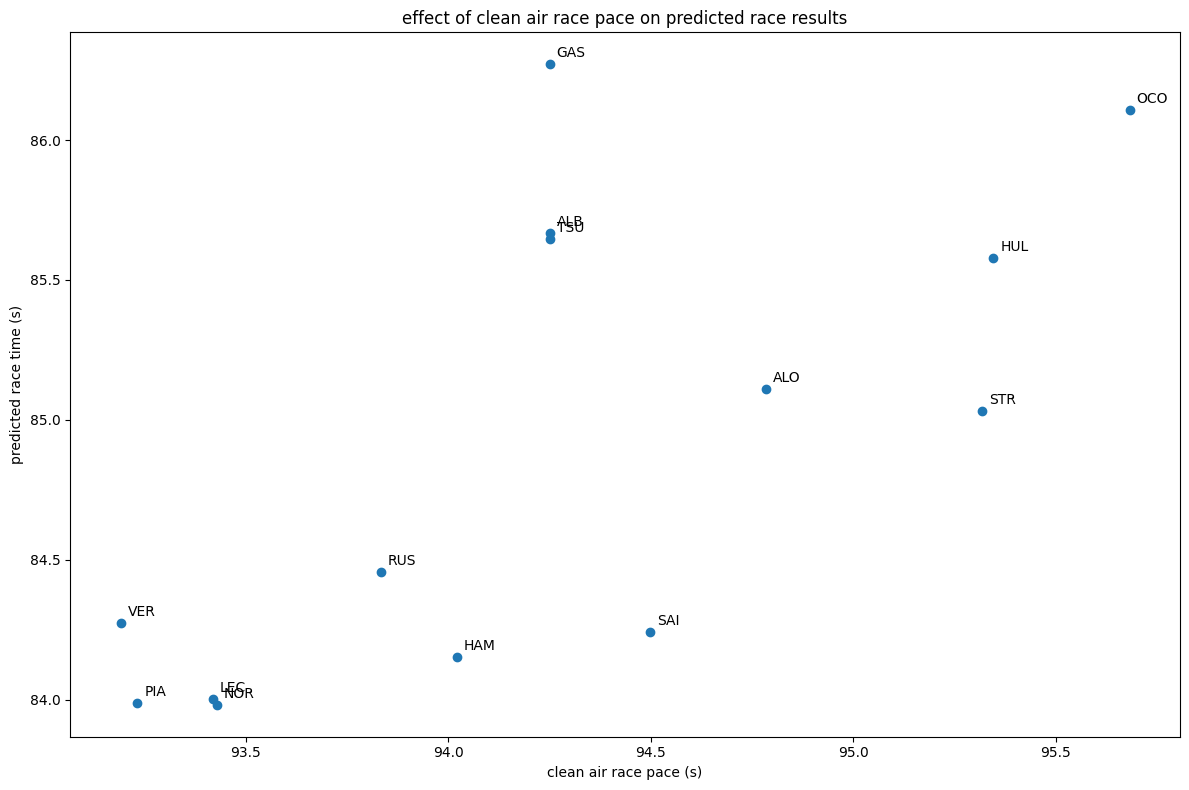

In [ ]:
# plot effect of clean air race pace

plt.figure(figsize=(12, 8))
plt.scatter(final_results["CleanAirRacePace (s)"], final_results["PredictedRaceTime (s)"])

for i, driver in enumerate(final_results["Driver"]):
    plt.annotate(driver, (final_results["CleanAirRacePace (s)"].iloc[i], final_results["PredictedRaceTime (s)"].iloc[i]),
                 xytext=(5, 5), textcoords='offset points')
plt.xlabel("clean air race pace (s)")
plt.ylabel("predicted race time (s)")
plt.title("effect of clean air race pace on predicted race results")
plt.tight_layout()
plt.show()

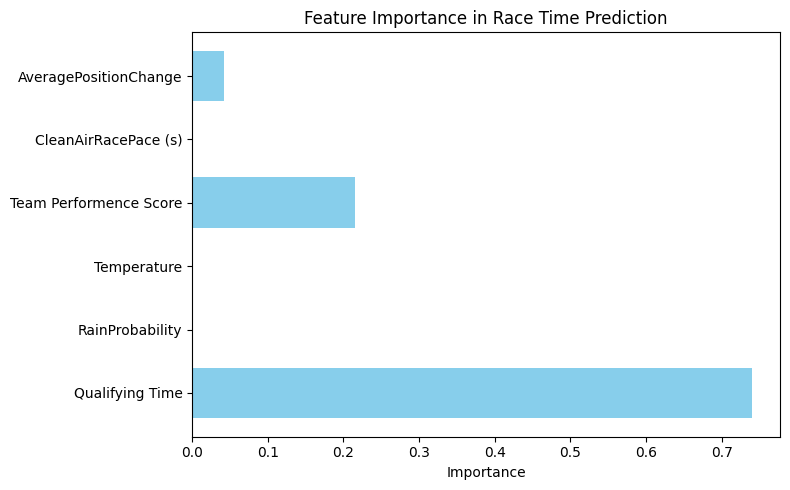

In [71]:
# Plot feature importances
feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importance in Race Time Prediction")
plt.tight_layout()
plt.show()

In [73]:
#  sort results and get top 3
final_results = merged_data.sort_values("PredictedRaceTime (s)").reset_index(drop=True)
podium = final_results.loc[:2, ["Driver", "PredictedRaceTime (s)"]]

print("\n🏆 Predicted in the Top 3 🏆")
print(f"🥇 P1: {podium.iloc[0]['Driver']}")
print(f"🥈 P2: {podium.iloc[1]['Driver']}")
print(f"🥉 P3: {podium.iloc[2]['Driver']}")


🏆 Predicted in the Top 3 🏆
🥇 P1: NOR
🥈 P2: PIA
🥉 P3: LEC
